In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import itertools
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle
matplotlib.rc("lines", markeredgewidth=0.5)
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
from scipy import sparse
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [0]:
with open('/content/drive/My Drive/Assignment2/X_train_sm_bow', 'rb') as f1:
    X_train_sm = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_sm_bow', 'rb') as f2:
  Y_train_sm = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_std_bow', 'rb') as f3:
  X_cv_std = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_bow', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_std_bow', 'rb') as f5:
  X_test_std = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_bow', 'rb') as f6:
  Y_test = pickle.load(f6)


In [0]:
print(X_train_sm.shape, Y_train_sm.shape)
print(X_cv_std.shape, Y_cv.shape)
print(X_test_std.shape, Y_test.shape)

(110392, 26612) (110392,)
(21850, 26612) (21850,)
(21850, 26612) (21850,)


In [0]:

auc_scores_cv = dict()
auc_scores_train = dict()

for i in range(1,20,2):
    # instantiate learning model (k = 20)
    print("k:", i)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on the train data
    knn.fit(X_train_sm, Y_train_sm)

    # predict the response on the crossvalidation data
    pred_cv = knn.predict(X_cv_std)

    # predict the response on the train data
    pred_train = knn.predict(X_train_sm)
    
    # evaluate CV AUC-ROC
    auc = roc_auc_score(Y_cv, pred_cv)
    auc_scores_cv[i] = auc
    print("Validation-AUC:", auc)
    
    # evaluate CV AUC-ROC
    auc = roc_auc_score(Y_train_sm, pred_train)
    auc_scores_train[i] = auc
    print("Train-AUC:", auc)

k: 1
Validation-AUC: 0.525268754008913
Train-AUC: 0.9999909413725632
k: 3
Validation-AUC: 0.5153858615954825
Train-AUC: 0.7045075730125372
k: 5
Validation-AUC: 0.5139978366727552
Train-AUC: 0.5997807812160302
k: 7
Validation-AUC: 0.5075087354132796
Train-AUC: 0.5532194361910283
k: 9
Validation-AUC: 0.5064491276913371
Train-AUC: 0.5295130081889992
k: 11
Validation-AUC: 0.5045293838743633
Train-AUC: 0.5168037538952098
k: 13
Validation-AUC: 0.5033201394144224
Train-AUC: 0.5093847380244946
k: 15
Validation-AUC: 0.5022245642859061
Train-AUC: 0.5054804695992463
k: 17
Validation-AUC: 0.5022039611692884
Train-AUC: 0.5033879266613522
k: 19
Validation-AUC: 0.5013741574403886
Train-AUC: 0.5019476048989058


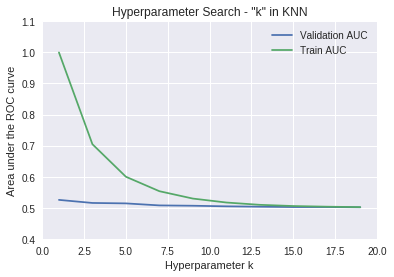

In [0]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(auc_scores_cv.keys(), auc_scores_cv.values(), label='Validation AUC')
plt.plot(auc_scores_train.keys(), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "k" in KNN')
plt.xlabel('Hyperparameter k')
plt.ylim([0.4,1.1])
plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
## Choose k as 3 and train the model and predict y labels for test data

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model on the train data
knn.fit(X_train_sm, Y_train_sm)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
## roc curve for knn python: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

# predict positive class probabilities for test data
pred_test_scores = knn.predict_proba(X_test_std)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = knn.predict_proba(X_train_sm)
fpr_train, tpr_train, threshold = roc_curve(Y_train_sm, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)



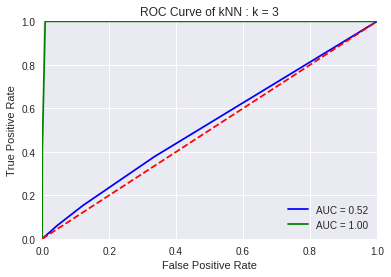

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN : k = 3')
plt.show()


In [0]:
## Confusion Matrix:

# predict the response on the test data
pred_test = knn.predict(X_test_std)

c_mat = confusion_matrix(Y_test, pred_test)


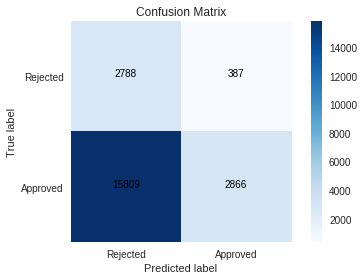

In [0]:
# sklearn confusion matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [0]:
with open('/content/drive/My Drive/Assignment2/X_train_sm_tfidf', 'rb') as f1:
    X_train_sm = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_sm_tfidf', 'rb') as f2:
  Y_train_sm = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_std_tfidf', 'rb') as f3:
  X_cv_std = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_tfidf', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_std_tfidf', 'rb') as f5:
  X_test_std = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_tfidf', 'rb') as f6:
  Y_test = pickle.load(f6)


In [0]:
print(X_train_sm.shape, Y_train_sm.shape)
print(X_cv_std.shape, Y_cv.shape)
print(X_test_std.shape, Y_test.shape)

(110392, 4097) (110392,)
(21850, 4097) (21850,)
(21850, 4097) (21850,)


In [0]:

auc_scores_cv = dict()
auc_scores_train = dict()

for i in range(1,20,2):
    # instantiate learning model (k = 20)
    print("k:", i)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on the train data
    knn.fit(X_train_sm, Y_train_sm)

    # predict the response on the crossvalidation data
    pred_cv = knn.predict(X_cv_std)

    # predict the response on the train data
    pred_train = knn.predict(X_train_sm)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_cv, pred_cv)
    auc_scores_cv[i] = auc_val
    print("Validation-AUC:", auc_val)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_train_sm, pred_train)
    auc_scores_train[i] = auc_val
    print("Train-AUC:", auc_val)

k: 1
Validation-AUC: 0.5272666399882721
Train-AUC: 0.9999909413725632
k: 3
Validation-AUC: 0.514943378849492
Train-AUC: 0.6534169142691499
k: 5
Validation-AUC: 0.5126841678696157
Train-AUC: 0.5973893035727226
k: 7
Validation-AUC: 0.5106332332673417
Train-AUC: 0.5823700992825567
k: 9
Validation-AUC: 0.5115355000944309
Train-AUC: 0.575920356547576
k: 11
Validation-AUC: 0.5117075889466921
Train-AUC: 0.5721972606710631
k: 13
Validation-AUC: 0.5104736471610622
Train-AUC: 0.5694524965577215
k: 15
Validation-AUC: 0.5105526697985164
Train-AUC: 0.566435973621277
k: 17
Validation-AUC: 0.5110629931485833
Train-AUC: 0.5641441408797739
k: 19
Validation-AUC: 0.5112809987756994
Train-AUC: 0.5606022175519966


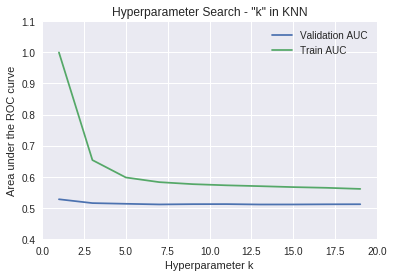

In [0]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(auc_scores_cv.keys(), auc_scores_cv.values(), label='Validation AUC')
plt.plot(auc_scores_train.keys(), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "k" in KNN')
plt.xlabel('Hyperparameter k')
plt.ylim([0.4,1.1])
plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
## Choose k as 3 and train the model and predict y labels for test data

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model on the train data
knn.fit(X_train_sm, Y_train_sm)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
## roc curve for knn python: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

# predict positive class probabilities for test data
pred_test_scores = knn.predict_proba(X_test_std)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = knn.predict_proba(X_train_sm)
fpr_train, tpr_train, threshold = roc_curve(Y_train_sm, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)



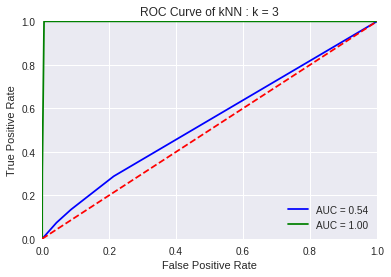

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN : k = 3')
plt.show()


In [0]:
## Confusion Matrix:

# predict the response on the test data
pred_test = knn.predict(X_test_std)

c_mat = confusion_matrix(Y_test, pred_test)


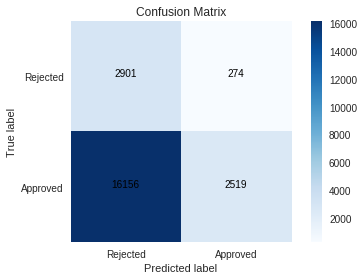

In [0]:
# sklearn confusion matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [0]:
## Using the original imbalanced data for training & taking only the top 200 features:


with open('/content/drive/My Drive/Assignment2/X_train_std_avgw2v', 'rb') as f1:
    X_train_std = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_avgw2v', 'rb') as f2:
  Y_train_std = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_std_avgw2v', 'rb') as f3:
  X_cv_std = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_avgw2v', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_std_avgw2v', 'rb') as f5:
  X_test_std = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_avgw2v', 'rb') as f6:
  Y_test = pickle.load(f6)


In [0]:
print(X_train_std.shape, Y_train_std.shape)
print(X_cv_std.shape, Y_cv.shape)
print(X_test_std.shape, Y_test.shape)

(65548, 697) (65548,)
(21850, 697) (21850,)
(21850, 697) (21850,)


In [0]:
## Truncated SVD to convert sparse matrix to dense matrix (dimensionality reduction) on avg-w2v 
## and tfidf-w2v vectorized data matrix

## original number of features 697
## reduce it to, say, 200 features

# truncated svd sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
X_train_sm_red = svd.fit_transform(X_train_std)
X_cv_std_red = svd.transform(X_cv_std)
X_test_std_red = svd.transform(X_test_std)


In [0]:
print(X_train_sm_red.shape, Y_train_std.shape)
print(X_cv_std_red.shape, Y_cv.shape)
print(X_test_std_red.shape, Y_test.shape)

(65548, 200) (65548,)
(21850, 200) (21850,)
(21850, 200) (21850,)


In [0]:
auc_scores_cv = dict()
auc_scores_train = dict()

for i in range(1,20,2):
    # instantiate learning model (k = 20)
    print("k:", i)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on the train data
    knn.fit(X_train_sm_red, Y_train_std)

    # predict the response on the crossvalidation data
    pred_cv = knn.predict(X_cv_std_red)

    # predict the response on the train data
    pred_train = knn.predict(X_train_sm_red)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_cv, pred_cv)
    auc_scores_cv[i] = auc_val
    print("Validation-AUC:", auc_val)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_train_std, pred_train)
    auc_scores_train[i] = auc_val
    print("Train-AUC:", auc_val)

'''auc_scores_cv = dict()
auc_scores_train = dict()

auc_scores_cv[1] = 0.521721980311697
auc_scores_cv[3] = 0.5219781545330598
auc_scores_cv[5] = 0.5151784216691958
auc_scores_cv[7] = 0.5094427869501268
auc_scores_cv[9] = 0.5061341377353564
auc_scores_cv[11] = 0.5063271378705093
auc_scores_cv[13] = 0.5040057213269992
auc_scores_cv[15] = 0.5028717134617153
auc_scores_cv[17] = 0.5018635695075635
auc_scores_cv[19] = 0.5014922291471586

auc_scores_train[1] = 0.9999909413725632
auc_scores_train[3] = 0.6512574256943333
auc_scores_train[5] = 0.5767981823493022
auc_scores_train[7] = 0.5414764238230197
auc_scores_train[9] = 0.5264555184150275
auc_scores_train[11] = 0.5184772933112439
auc_scores_train[13] = 0.5133998731288124
auc_scores_train[15] = 0.509680862035228
auc_scores_train[17] = 0.5078424997028995
auc_scores_train[19] = 0.5058411205793758

for i in range(1, 20, 2):
  print("k:", i)
  print("Validation-AUC:", auc_scores_cv[i])
  print("Train-AUC:", auc_scores_train[i])'''

k: 1
Validation-AUC: 0.521721980311697
Train-AUC: 0.9999909413725632
k: 3
Validation-AUC: 0.5219781545330598
Train-AUC: 0.6512574256943333
k: 5
Validation-AUC: 0.5151784216691958
Train-AUC: 0.5767981823493022
k: 7
Validation-AUC: 0.5094427869501268
Train-AUC: 0.5414764238230197
k: 9
Validation-AUC: 0.5061341377353564
Train-AUC: 0.5264555184150275
k: 11
Validation-AUC: 0.5063271378705093
Train-AUC: 0.5184772933112439
k: 13
Validation-AUC: 0.5040057213269992
Train-AUC: 0.5133998731288124
k: 15
Validation-AUC: 0.5028717134617153
Train-AUC: 0.509680862035228
k: 17
Validation-AUC: 0.5018635695075635
Train-AUC: 0.5078424997028995
k: 19
Validation-AUC: 0.5014922291471586
Train-AUC: 0.5058411205793758


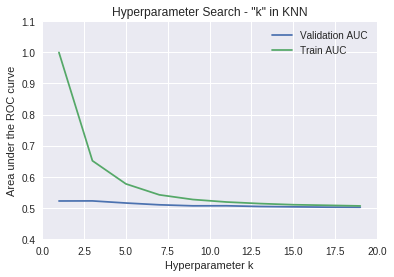

In [0]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(auc_scores_cv.keys(), auc_scores_cv.values(), label='Validation AUC')
plt.plot(auc_scores_train.keys(), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "k" in KNN')
plt.xlabel('Hyperparameter k')
plt.ylim([0.4,1.1])
plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
## Choose k as 3 and train the model and predict y labels for test data

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model on the train data
knn.fit(X_train_sm_red, Y_train_std)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
## roc curve for knn python: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

# predict positive class probabilities for test data
pred_test_scores = knn.predict_proba(X_test_std_red)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = knn.predict_proba(X_train_sm_red)
fpr_train, tpr_train, threshold = roc_curve(Y_train_std, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


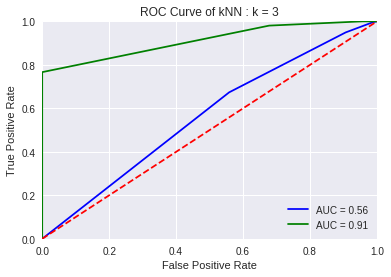

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN : k = 3')
plt.show()


In [0]:
## Confusion Matrix:

# predict the response on the test data
pred_test = knn.predict(X_test_std_red)

c_mat = confusion_matrix(Y_test, pred_test)


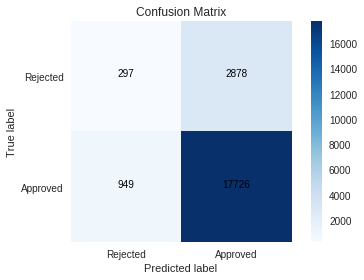

In [0]:
# sklearn confusion matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
## Using the original imbalanced data for training & taking only the top 200 features:


with open('/content/drive/My Drive/Assignment2/X_train_std_tfidfw2v', 'rb') as f1:
    X_train_std = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_avgw2v', 'rb') as f2:
  Y_train_std = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_std_tfidfw2v', 'rb') as f3:
  X_cv_std = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_avgw2v', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_std_tfidfw2v', 'rb') as f5:
  X_test_std = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_avgw2v', 'rb') as f6:
  Y_test = pickle.load(f6)


In [0]:
print(X_train_std.shape, Y_train_std.shape)
print(X_cv_std.shape, Y_cv.shape)
print(X_test_std.shape, Y_test.shape)

(65548, 697) (65548,)
(21850, 697) (21850,)
(21850, 697) (21850,)


In [0]:
## Truncated SVD to convert sparse matrix to dense matrix (dimensionality reduction) on avg-w2v 
## and tfidf-w2v vectorized data matrix

## original number of features 697
## reduce it to, say, 200 features

# truncated svd sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
X_train_sm_red = svd.fit_transform(X_train_std)
X_cv_std_red = svd.transform(X_cv_std)
X_test_std_red = svd.transform(X_test_std)


In [0]:
print(X_train_sm_red.shape, Y_train_std.shape)
print(X_cv_std_red.shape, Y_cv.shape)
print(X_test_std_red.shape, Y_test.shape)

(65548, 200) (65548,)
(21850, 200) (21850,)
(21850, 200) (21850,)


In [0]:
auc_scores_cv = dict()
auc_scores_train = dict()

for i in range(15,20,2):
    # instantiate learning model (k = 20)
    print("k:", i)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on the train data
    knn.fit(X_train_sm_red, Y_train_std)

    # predict the response on the crossvalidation data
    pred_cv = knn.predict(X_cv_std_red)

    # predict the response on the train data
    pred_train = knn.predict(X_train_sm_red)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_cv, pred_cv)
    auc_scores_cv[i] = auc_val
    print("Validation-AUC:", auc_val)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_train_std, pred_train)
    auc_scores_train[i] = auc_val
    print("Train-AUC:", auc_val)
'''
auc_scores_cv = dict()
auc_scores_train = dict()

auc_scores_cv[1] = 0.5267414806332905
auc_scores_cv[3] = 0.5222942450828769
auc_scores_cv[5] = 0.5175445223224643
auc_scores_cv[7] = 0.512605585469696
auc_scores_cv[9] = 0.5082691136829788
auc_scores_cv[11] = 0.5046878253630529
auc_scores_cv[13] = 0.5028442426395586
auc_scores_cv[15] = 0.5025462898761656
auc_scores_cv[17] = 0.5025266112583705
auc_scores_cv[19] = 0.5013726166090176

auc_scores_train[1] = 0.9999909413725632
auc_scores_train[3] = 0.6644517260843554
auc_scores_train[5] = 0.5864243845985748
auc_scores_train[7] = 0.5505625001610112
auc_scores_train[9] = 0.5312641094772789
auc_scores_train[11] = 0.5227183515639028
auc_scores_train[13] = 0.5149211449981872
auc_scores_train[15] = 0.5117606850920923
auc_scores_train[17] = 0.5080959872604617
auc_scores_train[19] = 0.5063995177561978

for i in range(1, 20, 2):
  print("k:", i)
  print("Validation-AUC:", auc_scores_cv[i])
  print("Train-AUC:", auc_scores_train[i])'''

k: 1
Validation-AUC: 0.5267414806332905
Train-AUC: 0.9999909413725632
k: 3
Validation-AUC: 0.5222942450828769
Train-AUC: 0.6644517260843554
k: 5
Validation-AUC: 0.5175445223224643
Train-AUC: 0.5864243845985748
k: 7
Validation-AUC: 0.512605585469696
Train-AUC: 0.5505625001610112
k: 9
Validation-AUC: 0.5082691136829788
Train-AUC: 0.5312641094772789
k: 11
Validation-AUC: 0.5046878253630529
Train-AUC: 0.5227183515639028
k: 13
Validation-AUC: 0.5028442426395586
Train-AUC: 0.5149211449981872
k: 15
Validation-AUC: 0.5025462898761656
Train-AUC: 0.5117606850920923
k: 17
Validation-AUC: 0.5025266112583705
Train-AUC: 0.5080959872604617
k: 19
Validation-AUC: 0.5013726166090176
Train-AUC: 0.5063995177561978


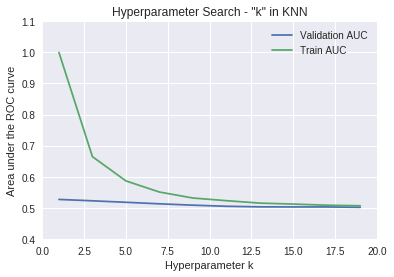

In [0]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(auc_scores_cv.keys(), auc_scores_cv.values(), label='Validation AUC')
plt.plot(auc_scores_train.keys(), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "k" in KNN')
plt.xlabel('Hyperparameter k')
plt.ylim([0.4,1.1])
plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
## Choose k as 5 and train the model and predict y labels for test data

knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model on the train data
knn.fit(X_train_sm_red, Y_train_std)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
## roc curve for knn python: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

# predict positive class probabilities for test data
pred_test_scores = knn.predict_proba(X_test_std_red)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = knn.predict_proba(X_train_sm_red)
fpr_train, tpr_train, threshold = roc_curve(Y_train_std, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


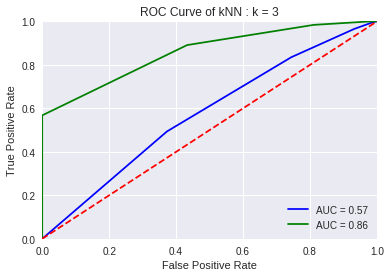

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN : k = 3')
plt.show()


In [0]:
## Confusion Matrix:

# predict the response on the test data
pred_test = knn.predict(X_test_std_red)

c_mat = confusion_matrix(Y_test, pred_test)



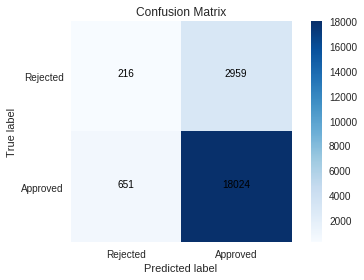

In [0]:
# sklearn confusion matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

### 2.4.5 Applying KNN - Select KBest on TFIDF,<font color='red'> SET 2</font>

In [0]:
### Without Standardization
### Without SMOTE Oversampling


with open('/content/drive/My Drive/Assignment2/X_train_wostd_tfidf', 'rb') as f1:
    X_train = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_tfidf', 'rb') as f2:
  Y_train = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_wostd_tfidf', 'rb') as f3:
  X_cv = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_tfidf', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_wostd_tfidf', 'rb') as f5:
  X_test = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_tfidf', 'rb') as f6:
  Y_test = pickle.load(f6)


In [0]:
print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

(65548, 26612) (65548,)
(21850, 26612) (21850,)
(21850, 26612) (21850,)


In [0]:
selectkbest = SelectKBest(chi2, k=2000)
X_train_kbest = selectkbest.fit_transform(X_train, Y_train)

X_cv_kbest = selectkbest.transform(X_cv)
X_test_kbest = selectkbest.transform(X_test)


In [0]:
print(X_train_kbest.shape, Y_train.shape)
print(X_cv_kbest.shape, Y_cv.shape)
print(X_test_kbest.shape, Y_test.shape)

(65548, 2000) (65548,)
(21850, 2000) (21850,)
(21850, 2000) (21850,)


In [0]:

auc_scores_cv = dict()
auc_scores_train = dict()

for i in range(1,20,2):
    # instantiate learning model (k = 20)
    print("k:", i)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on the train data
    knn.fit(X_train_kbest, Y_train)

    # predict the response on the crossvalidation data
    pred_cv = knn.predict(X_cv_kbest)

    # predict the response on the train data
    pred_train = knn.predict(X_train_kbest)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_cv, pred_cv)
    auc_scores_cv[i] = auc_val
    print("Validation-AUC:", auc_val)
    
    # evaluate CV AUC-ROC
    auc_val = roc_auc_score(Y_train, pred_train)
    auc_scores_train[i] = auc_val
    print("Train-AUC:", auc_val)

k: 1
Validation-AUC: 0.5169698802685978
Train-AUC: 0.9999909413725632
k: 3
Validation-AUC: 0.5122181324155262
Train-AUC: 0.6443411041422373
k: 5
Validation-AUC: 0.5113366888238218
Train-AUC: 0.5685446141741561
k: 7
Validation-AUC: 0.5073993363859404
Train-AUC: 0.5382281148321457
k: 9
Validation-AUC: 0.5040310349852367
Train-AUC: 0.520505540295743
k: 11
Validation-AUC: 0.5018826317928101
Train-AUC: 0.5107008641846569
k: 13
Validation-AUC: 0.4999925159619124
Train-AUC: 0.50666202543853
k: 15
Validation-AUC: 0.5006296277219336
Train-AUC: 0.5033777514565769
k: 17
Validation-AUC: 0.5002251814989296
Train-AUC: 0.502387662379047
k: 19
Validation-AUC: 0.5002917013904022
Train-AUC: 0.5014458731469577


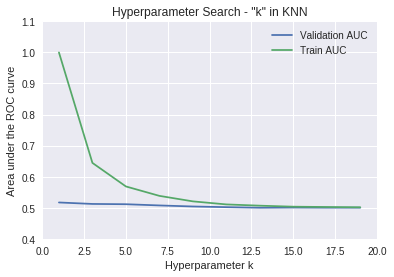

In [0]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(auc_scores_cv.keys(), auc_scores_cv.values(), label='Validation AUC')
plt.plot(auc_scores_train.keys(), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "k" in KNN')
plt.xlabel('Hyperparameter k')
plt.ylim([0.4,1.1])
plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
## Choose k as 5 and train the model and predict y labels for test data

knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model on the train data
knn.fit(X_train_kbest, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
## roc curve for knn python: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

# predict positive class probabilities for test data
pred_test_scores = knn.predict_proba(X_test_kbest)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = knn.predict_proba(X_train_kbest)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


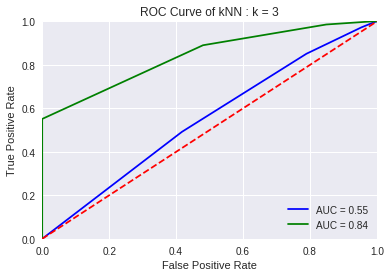

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN : k = 3')
plt.show()


In [0]:
## Confusion Matrix:

# predict the response on the test data
pred_test = knn.predict(X_test_kbest)

c_mat = confusion_matrix(Y_test, pred_test)



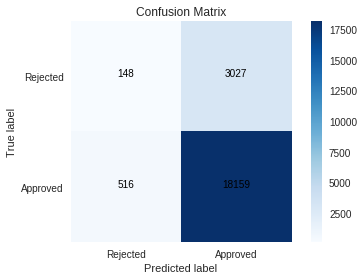

In [0]:
# sklearn confusion matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()